# Flight Delay Data Set
From Kaggle: https://www.kaggle.com/izumita/flight-delay-sample


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn import metrics

from xgboost import XGBRegressor


plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10)

%matplotlib inline

# Import and Characterize the Dataset

In [19]:
df = pd.read_csv('combined.csv')

In [3]:
df.shape

(22000, 30)

In [4]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,1987,11,28,6,2042.0,2025,2105.0,2053,PI,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,1987,10,22,4,1805.0,1800,1933.0,1905,HP,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2,1987,11,19,4,657.0,655,821.0,804,PI,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,3,1987,11,23,1,1848.0,1835,1944.0,1920,DL,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,1987,11,25,3,703.0,655,828.0,821,AA,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,21919.000000,22000.000000,22000.000000,...,13996.000000,14000.000000,22000.0,0.0,22000.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000
mean,10999.500000,1997.500000,6.726591,15.919591,4.017909,1458.535955,1422.683364,1581.473014,1580.288636,1229.434182,...,6.626107,16.708357,0.0,NaN,0.003773,9.113570,2.116703,7.632465,0.045428,12.000196
std,6350.997297,6.344433,3.527147,8.717935,1.981814,461.390627,456.661388,510.355497,480.344615,1259.218437,...,25.262758,16.496407,0.0,NaN,0.061308,31.452014,14.602250,21.833752,1.418739,29.955382
min,0.000000,1987.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5499.750000,1992.000000,4.000000,8.000000,2.000000,1109.000000,1050.000000,1235.000000,1234.000000,419.000000,...,4.000000,10.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10999.500000,1997.500000,7.000000,16.000000,4.000000,1505.000000,1445.000000,1639.000000,1632.000000,869.000000,...,5.000000,14.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16499.250000,2003.000000,10.000000,23.000000,6.000000,1834.000000,1805.000000,2007.000000,1955.000000,1607.000000,...,7.000000,19.000000,0.0,NaN,0.000000,3.000000,0.000000,4.000000,0.000000,9.000000
max,21999.000000,2008.000000,12.000000,31.000000,7.000000,2400.000000,2359.000000,2440.000000,2359.000000,9581.000000,...,1449.000000,1332.000000,0.0,NaN,1.000000,619.000000,307.000000,320.000000,72.000000,350.000000


In [8]:
# How many of each column are missing
# get names of columsn with missing values

cols_with_missing = [col for col in df.columns
                    if df[col].isnull().any()]

print('Columns with missing values: ', cols_with_missing)

for x in cols_with_missing:
    print(x, ':', df[x].isna().sum())

Columns with missing values:  ['ArrTime', 'TailNum', 'ActualElapsedTime', 'AirTime', 'ArrDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
ArrTime : 81
TailNum : 8000
ActualElapsedTime : 83
AirTime : 8050
ArrDelay : 83
Distance : 38
TaxiIn : 8004
TaxiOut : 8000
CancellationCode : 22000
CarrierDelay : 16893
WeatherDelay : 16893
NASDelay : 16893
SecurityDelay : 16893
LateAircraftDelay : 16893


In [9]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

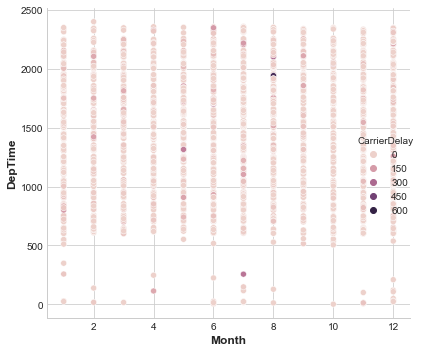

In [10]:
sns.relplot(x = 'Month', y = 'DepTime', hue = 'CarrierDelay', data = df)

## Restructure data set before pipeline

In [20]:
# we care about the total delay, so we will create a new total delay column, which is what we want to predict

df['TotalDelay'] = df.ArrDelay + df.DepDelay
print(df[['ArrDelay','DepDelay', 'TotalDelay']].head(10))

   ArrDelay  DepDelay  TotalDelay
0      12.0      17.0        29.0
1      28.0       5.0        33.0
2      17.0       2.0        19.0
3      24.0      13.0        37.0
4       7.0       8.0        15.0
5      31.0      17.0        48.0
6      22.0       8.0        30.0
7       NaN       2.0         NaN
8      -6.0       5.0        -1.0
9      17.0      20.0        37.0


In [21]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'TotalDelay'],
      dtype='object')

In [24]:
# create a copy of the dataframe for manipulation
df_edited = df.copy()

# remove rows that have NAN for TotalDelay
df_edited.dropna(subset=['TotalDelay'],inplace=True)

# remove columns related to delays
df_edited.drop(labels=['ArrDelay','DepDelay', 'CarrierDelay', 'WeatherDelay',
               'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
               'Unnamed: 0'],axis=1,inplace=True)

# remove other spurious columns
df_edited.drop(labels=['DepTime', 'ArrTime', 'TaxiIn', 'TaxiOut', 
                'Cancelled', 'CancellationCode', 'CRSElapsedTime',
                      'AirTime'], axis=1, inplace=True)

df_edited.head()


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,Origin,Dest,Distance,Diverted,TotalDelay
0,1987,11,28,6,2025,2053,PI,801,NaN,23.0,MIA,FLL,21.0,0,29.0
1,1987,10,22,4,1800,1905,HP,226,NaN,88.0,LAX,PHX,370.0,0,33.0
2,1987,11,19,4,655,804,PI,79,NaN,84.0,BOS,EWR,200.0,0,19.0
3,1987,11,23,1,1835,1920,DL,653,NaN,116.0,DFW,DEN,641.0,0,37.0
4,1987,11,25,3,655,821,AA,2277,NaN,85.0,SNA,OAK,371.0,0,15.0


In [25]:
# How many of each column are missing
# get names of columsn with missing values

cols_with_missing = [col for col in df_edited.columns
                    if df_edited[col].isnull().any()]

print('Columns with missing values: ', cols_with_missing)

for x in cols_with_missing:
    print(x, ':', df_edited[x].isna().sum())

Columns with missing values:  ['TailNum', 'Distance']
TailNum : 7967
Distance : 38


In [26]:
df_edited.shape

(21917, 15)

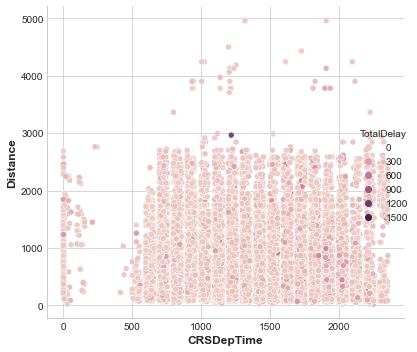

In [27]:
sns.relplot(x = 'CRSDepTime', y = 'Distance', hue = 'TotalDelay', data = df_edited)